In [1]:
import polars as pl
import constants

In [7]:
df = pl.read_csv(constants.RAW_RECIPIENTS_TABLE_CSV_PATH, ignore_errors=True).with_columns(pl.col('bonica.rid').alias('cand_id'))

In [18]:
pl.read_parquet(constants.CANDIDATE_EMBEDDINGS_WITH_CLUSTERS_PARQUET_PATH).filter(pl.col('cluster') < 3).join(df, how='left', on='cand_id').select(['cand_id', 'factor_0', 'factor_1', 'factor_2', 'factor_3', 'cluster', 'ico.status'])['ico.status'].value_counts(normalize=True)

ico.status,proportion
str,f64
"""O""",0.131125
"""C""",0.234181
"""I""",0.571419
"""""",0.05087
null,0.012406


In [13]:
df = (pl.scan_parquet(constants.CONTRIBUTIONS_TABLE_PARQUET_PATH)
      .select('recipient.state', pl.col('amount'), pl.col('candidate.id'))
      .group_by('recipient.state')
      .agg(pl.col('amount').sum().alias('total.amount'), pl.col('candidate.id').n_unique().alias('num.unique.candidates'))
      .collect())

In [17]:
df = df.with_columns(donation_per_cand = (pl.col('total.amount') / pl.col('num.unique.candidates')))

In [22]:
import plotly.express as px

# Assuming df has columns: 'state' (2-letter abbreviation) and 'median_donation_amount'
fig = px.choropleth(
    df.to_pandas(),
    locations='recipient.state',  # Column with state codes
    locationmode='USA-states',  # Tells plotly we're using US state codes
    color='donation_per_cand',  # Column to determine color
    color_continuous_scale='Viridis',  # Color scheme (try: Viridis, Blues, Reds, etc.)
    scope='usa',  # Focus on USA
    labels={'donation_per_cand': 'Total Donation Per Candidate ($)'},
    title='Total Donation Per Candidate, by State'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='white'),
    height=600
)

fig.show()


In [2]:
df = pl.scan_csv(constants.RAW_CONTRIBUTORS_TABLE_CSV_PATH).head(10).collect()

In [5]:
df = pl.read_csv(constants.RAW_RECIPIENTS_TABLE_CSV_PATH, ignore_errors=True)

In [10]:
df = pl.read_parquet(constants.CONTRIBUTIONS_TABLE_PARQUET_PATH)

In [11]:
df

transaction.id,transaction.type,date,amount,committee.id,contributor.name,contributor.address,contributor.city,contributor.state,contributor.zipcode,is.corp,candidate.id,recipient.name,candidate.party,recipient.state,election.type,ico.status
str,str,date,f64,i64,str,str,str,str,i64,str,str,str,str,str,str,str
"""comm:2010:256267""","""24K""",2010-02-04,1000.0,100031779,"""ALABAMA POWER COMPANY FEDERAL …","""600 n 18th stpo box 2641""","""birmingham""","""AL""",0,"""corp""","""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:408728""","""18K""",2009-08-31,150.0,100032743,"""STATE DEMOCRATIC EXECUTIVE COM…","""306 jefferson federal building""","""birmingham""","""AL""",0,null,"""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:255226""","""24K""",2009-03-23,1000.0,100095442,"""DIMENSION4 INC PAC""","""423 pacific ave 4th fl""","""bremerton""","""WA""",0,"""corp""","""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:229458""","""24K""",2010-06-24,250.0,100063408,"""MINUTEMAN PAC INC""","""po box 131768""","""houston""","""TX""",77219,null,"""cand34817""","""BARBER, RICK JOE""","""Republican""","""AL""","""P""","""C"""
"""comm:2010:444787""","""18K""",2010-04-01,3480.0,100047017,"""ALABAMA REPUBLICAN PARTY FEDER…","""po box 3315""","""birmingham""","""AL""",0,null,"""cand34817""","""BARBER, RICK JOE""","""Republican""","""AL""","""P""","""C"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""comm:2010:434264""","""18K""",2009-05-19,250.0,100032110,"""WISH LIST""","""210 w front st""","""red bank""","""NJ""",0,null,"""cand137""","""packwood, robert w""","""Other""","""OR""","""P""",null
"""comm:2010:354974""","""16C""",2010-03-31,515.0,101712626,"""GAILAS FOR CONGRESS COMMITTEE""","""7239 pineville matthews rd""","""charlotte""","""NC""",0,null,"""cand37711""","""GAILAS, TODD ANTHONY""","""Other""","""NC""","""P""",null
"""comm:2010:415751""","""18K""",2010-10-20,8100.0,100032138,"""REPUBLICAN PARTY OF KENTUCKY""","""capitol ave at 3rd st""","""frankfort""","""KY""",0,null,"""cand1451""","""NORTHUP, ANNE MEAGHER""","""Other""","""KY""","""P""",null


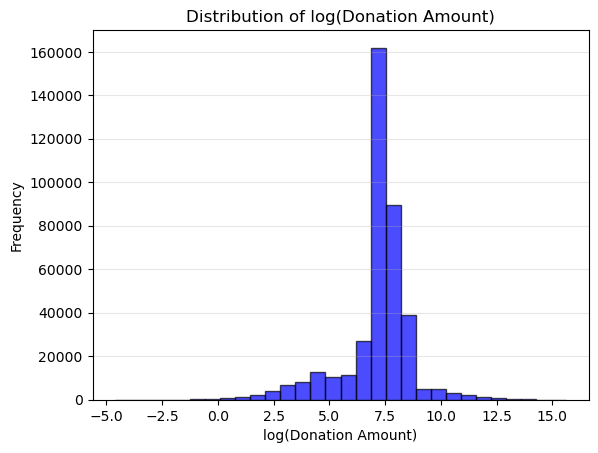

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data = df['amount'].to_numpy()

# With more customization
plt.hist(np.log(data), bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('log(Donation Amount)')
plt.ylabel('Frequency')
plt.title('Distribution of log(Donation Amount)')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [3]:
df

transaction.id,transaction.type,date,amount,committee.id,contributor.name,contributor.address,contributor.city,contributor.state,contributor.zipcode,is.corp,candidate.id,recipient.name,candidate.party,recipient.state,election.type,ico.status
str,str,date,f64,i64,str,str,str,str,i64,str,str,str,str,str,str,str
"""comm:2010:256267""","""24K""",2010-02-04,1000.0,100031779,"""ALABAMA POWER COMPANY FEDERAL …","""600 n 18th stpo box 2641""","""birmingham""","""AL""",0,"""corp""","""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:408728""","""18K""",2009-08-31,150.0,100032743,"""STATE DEMOCRATIC EXECUTIVE COM…","""306 jefferson federal building""","""birmingham""","""AL""",0,null,"""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:255226""","""24K""",2009-03-23,1000.0,100095442,"""DIMENSION4 INC PAC""","""423 pacific ave 4th fl""","""bremerton""","""WA""",0,"""corp""","""cand34804""","""BOZEMAN, MARTHA RENEE""","""Democrat""","""AL""","""P""","""O"""
"""comm:2010:229458""","""24K""",2010-06-24,250.0,100063408,"""MINUTEMAN PAC INC""","""po box 131768""","""houston""","""TX""",77219,null,"""cand34817""","""BARBER, RICK JOE""","""Republican""","""AL""","""P""","""C"""
"""comm:2010:444787""","""18K""",2010-04-01,3480.0,100047017,"""ALABAMA REPUBLICAN PARTY FEDER…","""po box 3315""","""birmingham""","""AL""",0,null,"""cand34817""","""BARBER, RICK JOE""","""Republican""","""AL""","""P""","""C"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""comm:2010:434264""","""18K""",2009-05-19,250.0,100032110,"""WISH LIST""","""210 w front st""","""red bank""","""NJ""",0,null,"""cand137""","""packwood, robert w""","""Other""","""OR""","""P""",null
"""comm:2010:354974""","""16C""",2010-03-31,515.0,101712626,"""GAILAS FOR CONGRESS COMMITTEE""","""7239 pineville matthews rd""","""charlotte""","""NC""",0,null,"""cand37711""","""GAILAS, TODD ANTHONY""","""Other""","""NC""","""P""",null
"""comm:2010:415751""","""18K""",2010-10-20,8100.0,100032138,"""REPUBLICAN PARTY OF KENTUCKY""","""capitol ave at 3rd st""","""frankfort""","""KY""",0,null,"""cand1451""","""NORTHUP, ANNE MEAGHER""","""Other""","""KY""","""P""",null


In [9]:
agg_donations_df = df.select(['committee.id', 'candidate.id', 'amount']).group_by(['committee.id', 'candidate.id']).sum()

In [12]:
agg_donations_df

committee.id,candidate.id,amount
i64,str,i64
100031930,"""cand39372""",500
100031986,"""cand403""",200
108168941,"""cand251""",500
100031877,"""cand391""",500
40923,"""cand157""",250
…,…,…
100031556,"""cand257""",400
100048276,"""cand515""",200
100050277,"""cand303""",500


In [14]:
76473/(2726 * 1566)

0.017913915382734166

In [10]:
agg_donations_df['committee.id'].unique()

committee.id
i64
935
943
1636
1925
2303
…
35398802066
35398802158
35400803005


In [11]:
agg_donations_df['candidate.id'].unique()

candidate.id
str
"""cand56291"""
"""cand35308"""
"""cand37456"""
"""cand409"""
"""cand37327"""
…
"""cand53339"""
"""cand35929"""
"""cand37272"""


In [122]:
df.group_by(['committee.id', 'candidate.party']).sum().sort(by='amount', descending=True).group_by('committee.id', maintain_order=True).first()[['committee.id', 'candidate.party', 'amount']]

committee.id,candidate.party,amount
i64,str,i64
100031435,"""Republican""",5271071
36035281644,"""Republican""",3182181
100031433,"""Republican""",1488401
2832,"""Democrat""",1458140
100031430,"""Republican""",1129109
…,…,…
100770433,"""Republican""",10
100739327,"""Republican""",10
101339345,"""Democrat""",10


In [107]:
df.null_count()

transaction.id,transaction.type,date,amount,committee.id,contributor.name,contributor.address,contributor.city,contributor.state,contributor.zipcode,is.corp,candidate.id,recipient.name,candidate.party,recipient.state,election.type,ico.status
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,198,55,56,0,35424,0,0,0,0,6,752


In [106]:
df['ico.status'].unique()

ico.status
str
"""I"""
""""""
null
"""O"""
"""C"""
